# Introduction to the tidyverse
The [tidyverse](https://www.tidyverse.org/) is an opinionated collection of R packages designed for data science. All packages share an underlying design philosophy, grammar, and data structures.

![tidyverse](../fig/tidyverse.jpg "title-1")

And you can load all these packages with a simple command

In [9]:
library(tidyverse)

As messages and warnings suggest, by loading tidyverse we are really loading a *set of packages*: ggplot2, dplyr, tidyr...

### The Pipe operator

Now we are going to have a rapid survey of some of these packages, but first you need to make friends with the **pipe** operator (**%>%** <- this guy here!). 

The pipe operator (also known out of the *R* world as **|**) has been first introduced by the developers of the **magrittr** package:

![Magrittr](../fig/magrittr.png "title-1")

This operator allows to concatenate a *R* value or the result of a *R* function with other *R* functions, the value at the left of the **%>%** will be interpret as the first value for the function at the right of it:

In [2]:
names(mtcars)
head(mtcars, n = 5)
mean(rnorm(100))

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


[1] -0.08698128

Can be rewritten using a **%>%** as follows:

In [3]:
mtcars %>% names
mtcars %>% head(n = 5)
rnorm(10) %>% mean

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


[1] 0.04769054

And....*so what*? Obviously....with more than one *pipe* you can build a pipeline...

What if I'd like to take the **5** cars with the highest mpg values, add to them standard normal noise and plot it?

Here a way to do it without a pipeline:

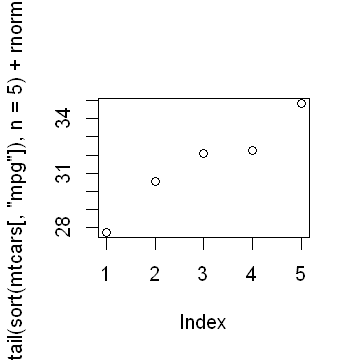

In [7]:
plot(tail(sort(mtcars[, "mpg"]), n = 5) + rnorm(5))

And here a way to obtain the same result with a *pipeline*:

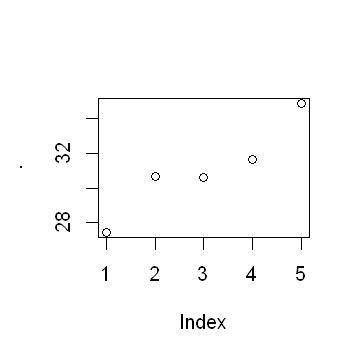

In [6]:
mtcars %>% pull(mpg) %>% sort %>% tail(n = 5) %>% `+`(rnorm(5)) %>% plot

*P.S.* here we used a trick: you can call operator functions like **+**, **-**, **\***, **/** and many others, simply by including them between two backticks \`\` (on windows you can obtain a backtick using the key combination ALT+96)

A last thing about **%>%**...it works even if the function at the right of the pipe does not want the value at the left of it as first argument. We can use the point **.** as placeholder, as example, this linear regression:

In [6]:
lm(mpg ~ cyl, mtcars)


Call:
lm(formula = mpg ~ cyl, data = mtcars)

Coefficients:
(Intercept)          cyl  
     37.885       -2.876  


Can be *pipelinezed* as:

In [7]:
mtcars %>% lm(mpg ~ cyl, .)


Call:
lm(formula = mpg ~ cyl, data = .)

Coefficients:
(Intercept)          cyl  
     37.885       -2.876  


### DPLYR

After the pipe operator we can start with the first useful package of the tidyverse, **dplyr**:

![DPLYR](../fig/dplyr_small.png "title-1")

This package is the *de-facto* standard for data manipulation in modern R.

It consists of *single table* verbs to manipulate a single table:


In [8]:
mtcars %>% sample_n(5) -> smcars # randomly choosy five cars
smcars %>% pull(cyl) %>% max -> max_cyl
max_cyl
smcars
smcars %>% filter(cyl == max_cyl) # choose cars with six cylinders
smcars %>% arrange(desc(hp)) # arrange the cars by descending hp
smcars %>% select(carb, cyl) # select only two columns of the datasets
smcars %>% rename(cylinder = cyl, horsepower = hp) # rename some variable
smcars %>% mutate(cyl = 2 * cyl, tot = am + gear + carb) # create new columns or modify old ones
smcars %>% summarise(mean_hp = mean(hp))

[1] 8

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
Merc 280,19.2,6,167.6,123,3.92,3.44,18.30,1,0,4,4
Merc 230,22.8,4,140.8,95,3.92,3.15,22.90,1,0,4,2
Merc 450SE,16.4,8,275.8,180,3.07,4.07,17.40,0,0,3,3
Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
16.4,8,275.8,180,3.07,4.07,17.40,0,0,3,3
18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
16.4,8,275.8,180,3.07,4.07,17.40,0,0,3,3
18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2
19.2,6,167.6,123,3.92,3.44,18.30,1,0,4,4
22.8,4,140.8,95,3.92,3.15,22.90,1,0,4,2


,carb,cyl
Duster 360,4,8
Merc 280,4,6
Merc 230,2,4
Merc 450SE,3,8
Hornet Sportabout,2,8


,mpg,cylinder,disp,horsepower,drat,wt,qsec,vs,am,gear,carb
Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
Merc 280,19.2,6,167.6,123,3.92,3.44,18.30,1,0,4,4
Merc 230,22.8,4,140.8,95,3.92,3.15,22.90,1,0,4,2
Merc 450SE,16.4,8,275.8,180,3.07,4.07,17.40,0,0,3,3
Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,tot
14.3,16,360.0,245,3.21,3.57,15.84,0,0,3,4,7
19.2,12,167.6,123,3.92,3.44,18.30,1,0,4,4,8
22.8,8,140.8,95,3.92,3.15,22.90,1,0,4,2,6
16.4,16,275.8,180,3.07,4.07,17.40,0,0,3,3,6
18.7,16,360.0,175,3.15,3.44,17.02,0,0,3,2,5


mean_hp
163.6


The **group_by** operation to change the way in which some *single table verbs* are applied to the table:

In [9]:
mtcars %>% group_by(cyl) %>% summarise(hp = mean(hp)) # mean hp for each cyl value
mtcars %>% group_by(cyl) %>% sample_n(2) # randomly choose two samples for each cyl value
mtcars %>% group_by(cyl) %>% mutate(mean_hp_by_cyl = mean(hp)) %>% arrange(desc(cyl)) %>% sample_n(1) # what does it do? 

cyl,hp
4,82.63636
6,122.28571
8,209.21429


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mean_hp_by_cyl
21.4,4,121,109,4.11,2.78,18.60,1,1,4,2,82.63636
19.7,6,145,175,3.62,2.77,15.50,0,1,5,6,122.28571
10.4,8,472,205,2.93,5.25,17.98,0,0,3,4,209.21429


And also *two tables verbs*, in particular **joins**:

In [10]:
mtcars$name <- rownames(mtcars)
mtcars_table_1 <- mtcars %>% select(name, hp) %>% head(n = 10)
mtcars_table_2 <- mtcars %>% select(name, cyl,hp) %>% head(n = 10) %>% sample_n(5) %>%  mutate(hp = 2 * hp)

mtcars_table_1
mtcars_table_2

mtcars_table_1 %>% left_join(mtcars_table_2, by = "name", suffix = c("_one", "_two"))
mtcars_table_1 %>% right_join(mtcars_table_2, by = "name", suffix = c("_one", "_two"))
mtcars_table_2 %>% inner_join(mtcars_table_1, by = "name", suffix = c("_two", "_one"))

,name,hp
Mazda RX4,Mazda RX4,110
Mazda RX4 Wag,Mazda RX4 Wag,110
Datsun 710,Datsun 710,93
Hornet 4 Drive,Hornet 4 Drive,110
Hornet Sportabout,Hornet Sportabout,175
Valiant,Valiant,105
Duster 360,Duster 360,245
Merc 240D,Merc 240D,62
Merc 230,Merc 230,95
Merc 280,Merc 280,123


name,cyl,hp
Merc 230,4,190
Mazda RX4,6,220
Valiant,6,210
Hornet 4 Drive,6,220
Datsun 710,4,186


name,hp_one,cyl,hp_two
Mazda RX4,110,6,220
Mazda RX4 Wag,110,NA,NA
Datsun 710,93,4,186
Hornet 4 Drive,110,6,220
Hornet Sportabout,175,NA,NA
Valiant,105,6,210
Duster 360,245,NA,NA
Merc 240D,62,NA,NA
Merc 230,95,4,190
Merc 280,123,NA,NA


name,hp_one,cyl,hp_two
Merc 230,95,4,190
Mazda RX4,110,6,220
Valiant,105,6,210
Hornet 4 Drive,110,6,220
Datsun 710,93,4,186


name,cyl,hp_two,hp_one
Merc 230,4,190,95
Mazda RX4,6,220,110
Valiant,6,210,105
Hornet 4 Drive,6,220,110
Datsun 710,4,186,93


But there is a lot more about **dplyr** and his friends but we have no more time, but you do! So here's some links:

* [Window functions](https://cran.r-project.org/web/packages/dplyr/vignettes/window-functions.html) to compute cumulative sum, mean or build rankins among observations
* More [two table verbs](https://cran.r-project.org/web/packages/dplyr/vignettes/two-table.html) to compute, as example, union, intersection, and symmetric difference of tables
* [Deep dive](https://cran.r-project.org/web/packages/dplyr/vignettes/programming.html) in the way **dplyr** is built and how to effectively use it to write custom verbs
* How to use dplyr as frontend to standard databases ([dbplyr](https://cran.r-project.org/web/packages/dbplyr/index.html)) or big data stacks ([sparklyr](http://spark.rstudio.com/dplyr/))

### GGPLOT

Another great package in tidyverse is [ggplot](http://ggplot2.org/) a versatile plotting system. The full introduction to this package is out of the scope of this lesson (but it's covered during the R course!).

![Standard KNN Kernel](../fig/ggplot.png "title-1")

In the following lessons we are going to use  ggplot extensively, if you have some doubts on its functioning let us know! :)

In the following an example of its capabilities:

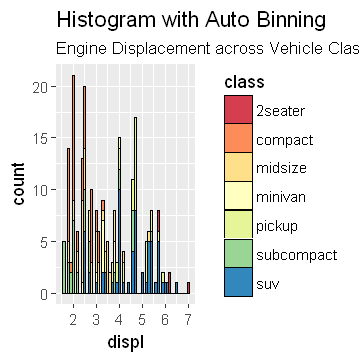

In [13]:
mpg %>%  ggplot(aes(displ)) + scale_fill_brewer(palette = "Spectral") + geom_histogram(aes(fill=class), 
                   binwidth = .1, 
                   col="black", 
                   size=.1) +  # change binwidth
  labs(title="Histogram with Auto Binning", 
       subtitle="Engine Displacement across Vehicle Classes")  